In [62]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Roteiro

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [12]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


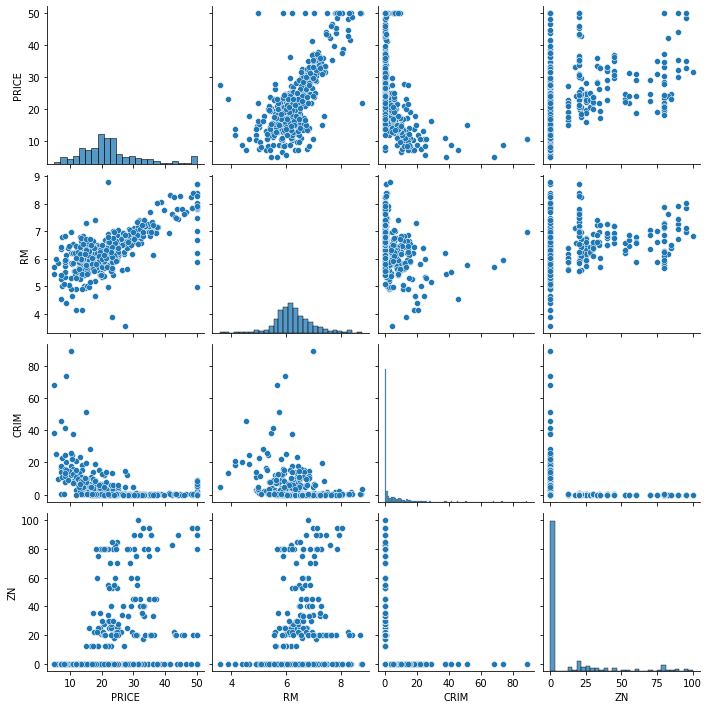

In [14]:
sns.pairplot(df[['PRICE', 'RM', 'CRIM', 'ZN']])

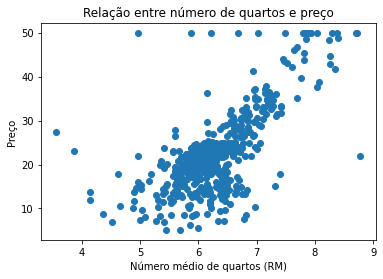

In [15]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel("Número médio de quartos (RM)")
plt.ylabel("Preço")
plt.title("Relação entre número de quartos e preço")
plt.show()

Correlação de Pearson: 0.695
Valor-p: 2.487229e-74


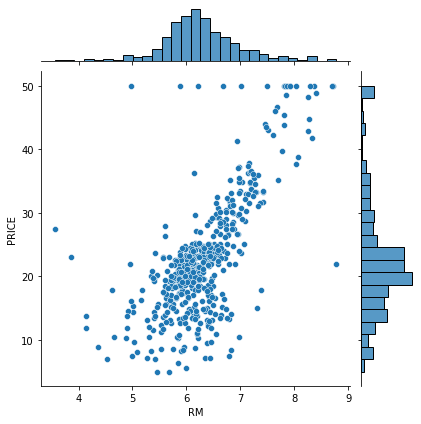

In [16]:
from scipy.stats import pearsonr

sns.jointplot(x='RM', y='PRICE', data=df)
r, p = stats.pearsonr(df['RM'], df['PRICE'])
print("Correlação de Pearson: %.3f" % r)
print("Valor-p: %e" % p)

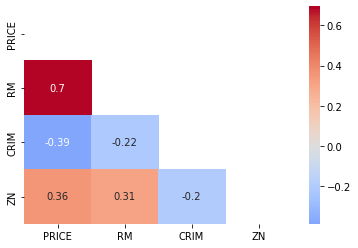

In [18]:
cols=['PRICE', 'RM', 'CRIM', 'ZN']
Var_Corr = df[cols].corr()
matrix = np.triu(df[cols].corr())
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True, center=0, cmap='coolwarm', mask=matrix)

In [19]:
from sklearn.linear_model import LinearRegression
X = df.RM
Y = df.PRICE
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))

Coeficiente estimado:  [9.10210898]
R2 (score):  0.4835254559913343


In [20]:
from sklearn.linear_model import LinearRegression
X = df.drop('PRICE', axis = 1)
Y = df.PRICE
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values, Y))

R2 (score):  0.7406426641094095


In [25]:
print('Intercept %.3f' % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Intercept 36.459


,Coefficient
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


In [26]:
lm.predict(X.loc[1].values.reshape(1,-1))

array([25.02556238])

In [28]:
import statsmodels.api as sm
import pandas.util.testing as tm

X = df.drop('PRICE', axis = 1)
y = df.PRICE
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        11:38:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [29]:
X = df.drop('PRICE', axis=1)
X = X.drop('AGE', axis=1)
X = X.drop('INDUS', axis=1)
y = df.PRICE
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          5.54e-137
Time:                        11:40:38   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

# Atividades

In [3]:
tempo = pd.read_csv("/content/weatherHistory.csv", index_col=False, header=None, squeeze=True)
display(tempo)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96449,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.0167,26.0167,0.43,10.9963,31,16.1,0,1014.36,Partly cloudy starting in the morning.
96450,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.5833,24.5833,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96451,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.0389,22.0389,0.56,8.9838,30,16.1,0,1015.66,Partly cloudy starting in the morning.
96452,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.5222,21.5222,0.6,10.5294,20,16.1,0,1015.95,Partly cloudy starting in the morning.


## Letra a

In [30]:
tempo.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,96454,96454,95937,96454,96454,96454,96454,96454,96454,96454,96454,96454
unique,96430,28,3,13087,15650,175,4467,721,1784,3,8733,215
top,2010-08-02 02:00:00.000 +0200,Partly Cloudy,rain,7.222222222222222,17.77777777777778,0.93,3.22,0.0,9.982000000000001,0.0,0.0,Mostly cloudy throughout the day.
freq,2,31733,85224,375,317,3577,1739,1551,15225,65535,899,20085


In [67]:
t = tempo[1:]

In [68]:
t.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
5,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755555555555553,6.977777777777779,0.83,11.0446,259.0,15.826300000000002,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
label_encoder = LabelEncoder()

t[3] = t[3].astype(str).astype(float)
t[4] = t[4].astype(str).astype(float)
t[5] = t[5].astype(str).astype(float)
t[6] = t[6].astype(str).astype(float)
t[7] = t[7].astype(str).astype(float)
t[8] = t[8].astype(str).astype(float)
t[9] = t[9].astype(str).astype(float)
t[10] = t[10].astype(str).astype(float)

print(t.dtypes)

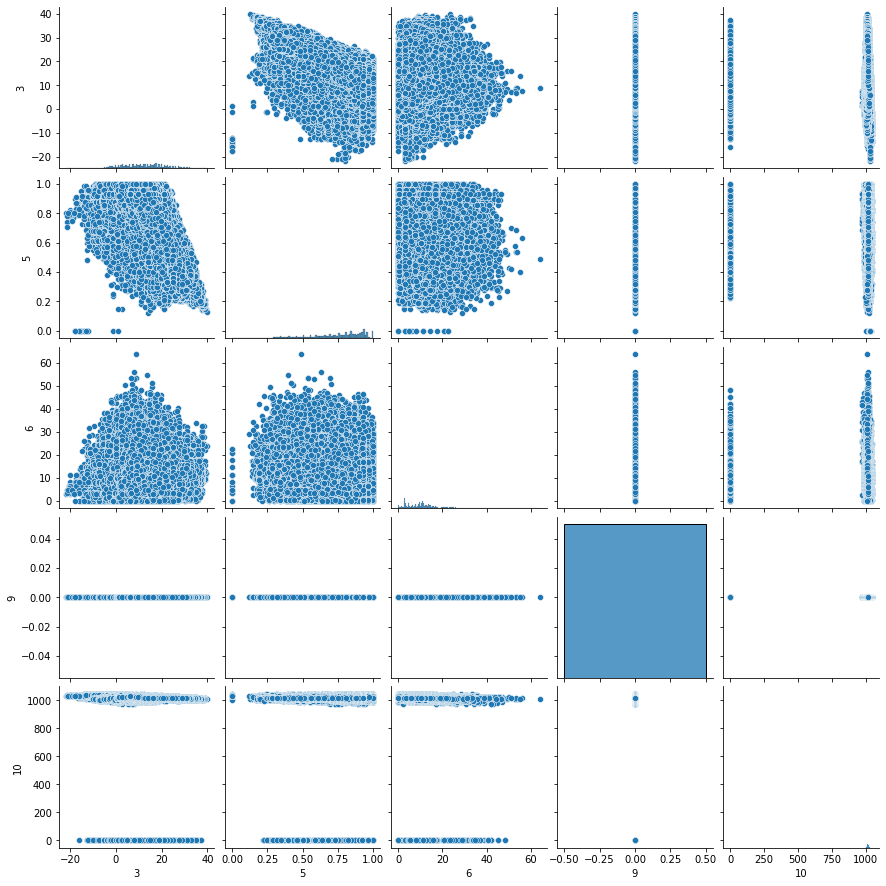

In [73]:
sns.pairplot(t[[1, 2, 3, 5, 6, 9, 10, 11]])

## Letra b

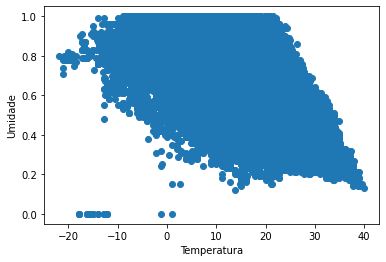

In [76]:
plt.scatter(t[3], t[5])
plt.xlabel("Temperatura")
plt.ylabel("Umidade")
plt.show()

Correlação de Person: -0.632
Valor-p: 0.000000e+00


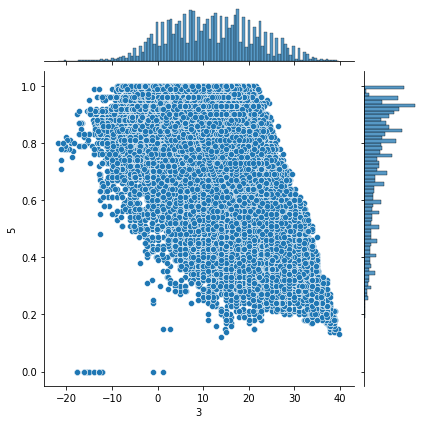

In [80]:
from scipy.stats import pearsonr

sns.jointplot(x=3, y=5, data=t)
r, p = stats.pearsonr(t[3], t[5])

print("Correlação de Person: %.3f" % r)
print("Valor-p: %e" %p)

In [81]:
from sklearn.linear_model import LinearRegression

x = t[3]
y = t[5]
lm = LinearRegression()
lm.fit(x.values.reshape(-1,1), y)

print('Coeficiente estimado: ', lm.coef_)
print('Score R2: ', lm.score(x.values.reshape(-1,1),y))

Coeficiente estimado:  [-0.01293911]
Score R2:  0.3997459740945123


Há uma relação negativa entre as variáveis. A cada aumento de temperatura, a humidade cai 0.01. 60% da variação da humidade não é explicada pela temperatura.
A equação linear seria: x = -0.01y, sendo x a temperatura e y a umidade.

## Letra c

In [82]:
from sklearn.linear_model import LinearRegression

x = t[3]
y = t[[5,6]]
lm = LinearRegression()
lm.fit(x.values.reshape(-1,1), y)

print('Coeficiente estimado: ', lm.coef_)
print('Score R2: ', lm.score(x.values.reshape(-1,1),y))

Coeficiente estimado:  [[-0.01293911]
 [ 0.00648321]]
Score R2:  0.0003994673765120138


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


A equação linear seria: x = -0.01y + 0.006z, sendo x a temperatura, y a umidade e z a velocidade do vento.

## Letra d

In [83]:
from sklearn.linear_model import LinearRegression

x = t[4]
y = t[[3,5,6]]
lm = LinearRegression()
lm.fit(x.values.reshape(-1,1), y)

print('Coeficiente estimado: ', lm.coef_)
print('Score R2: ', lm.score(x.values.reshape(-1,1),y))

Coeficiente estimado:  [[ 0.88634879]
 [-0.0110113 ]
 [-0.03661375]]
Score R2:  0.6475927185255527


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


A equação linear seria: x = 0.88y - 0.01z - 0.03w, sendo x a temperatura aparente, y a temperatura, z a umidade e w a velocidade do vento.

In [85]:
tempo.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.


## Letra e

In [90]:
import statsmodels.api as sm
import pandas.util.testing as tm

X = t.drop(5, axis = 1)
X = X.drop(0, axis = 1)
X = X.drop(1, axis = 1)
X = X.drop(2, axis = 1)
X = X.drop(11, axis = 1)
y = t[5]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                 1.435e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:33:46   Log-Likelihood:                 51358.
No. Observations:               96453   AIC:                        -1.027e+05
Df Residuals:                   96446   BIC:                        -1.026e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0139      0.004    238.159      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


As variáveis numéricas desse dataset não são indicadas para prever a umidade, pois ocorre um ajuste ruim entre elas(R^2 = 0.472).